In [113]:
from pprint import pprint
import numpy as np
import re
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.neighbors import NearestNeighbors
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [77]:
profiles = pd.read_csv('C:/Users/maksim/QuickDatingModel/Data/okcupid_profiles.csv')

In [78]:
profiles.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [79]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [80]:
profiles.shape

(59946, 31)

In [81]:
df = profiles.copy()
df['height'] = df['height'].apply(lambda x: round(x * 2.54, 0))

In [82]:
df.describe()

,age,height,income
count,59946.000000,59943.00000,59946.000000
mean,32.340290,173.45997,20033.222534
std,9.452779,10.10919,97346.192104
min,18.000000,3.00000,-1.000000
25%,26.000000,168.00000,-1.000000
50%,30.000000,173.00000,-1.000000
75%,37.000000,180.00000,-1.000000
max,110.000000,241.00000,1000000.000000


In [83]:
df.head(3)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",190.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,178.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,173.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."


In [84]:
# Missing Values
mask = df['height'].mean()
df.loc[mask, 'height'] = df['height'].median()
df.loc[df.income == -1, 'income'] = np.NaN
isna_cols = df.loc[:, df.isna().any()].columns
missing_values = df[isna_cols[:12]].isna().sum().sort_values(ascending=False)

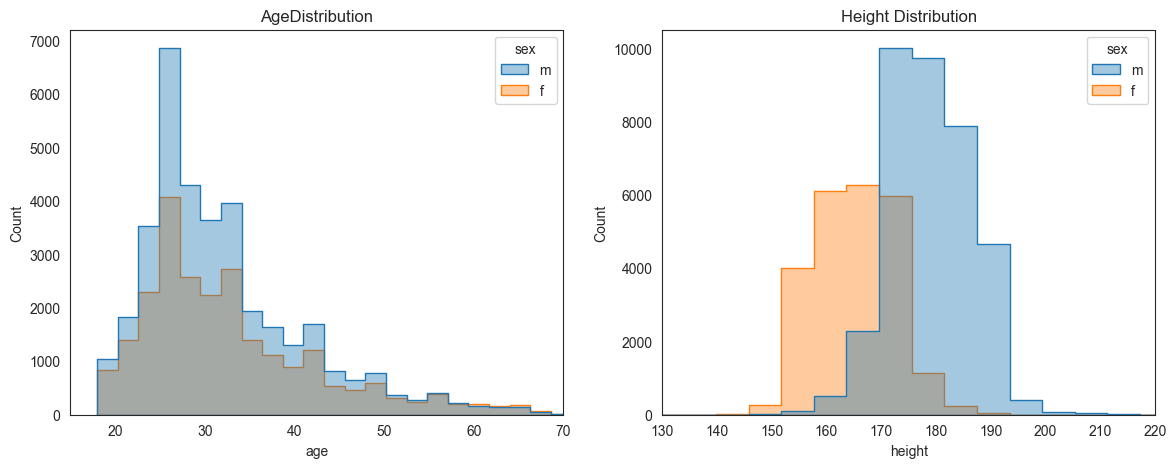

In [85]:
df['age'] = df['age'].fillna(df['age'].mean())
df['height'] = df['height'].fillna(df['height'].mean())

sns.set_style("white")
num_cols = ['age', 'height']
xlims = [(15, 70), (130, 220)]
titles = ['AgeDistribution', 'Height Distribution']
fig2, ax2 = plt.subplots(ncols=2, figsize=(14,5), sharey=False)
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=ax2[i], hue='sex', element='step',
                bins=40, alpha=0.4)
    ax2[i].set(xlim=xlims[i], title=titles[i])

In [86]:
def map_cat(a_string, a_dic):
    """
    a_string: a string we want to map with a_dic
    a_dic: a dictionary whose keys are tuples
    """
    for k in a_dic:
        if a_string in k:
            return a_dic.get(k)
    return np.NaN

In [87]:
df.body_type.value_counts(dropna=False)

body_type
average           14652
fit               12711
athletic          11819
NaN                5297
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64

In [88]:
body_types_dic = {('skinny', 'used up', 'thin'): 'ectomorph',
                 ('average', 'fit', 'athletic', 'jacked'): 'mesomorph',
                 ('a little extra', 'curvy', 'full figured'): 'endomorph'}

body_categories = CategoricalDtype(categories=['ectomorph', 'mesomorph',
                                              'endomorph'], ordered=True)

df['body_type_'] = df.body_type.apply(map_cat, args=(body_types_dic,)).astype(body_categories)
df.body_type_ = df.body_type_.fillna(body_categories.categories
                        [int(np.median(df.body_type_.cat.codes))])

education_categories = CategoricalDtype(categories=['High school or less',
                                                   'Some college',
                                                   'College or more',
                                                   'Post graduate degree'],
                                       ordered=True)

education_dic= {('graduated from high school','dropped out of high school', 
                 'working on high school','high school'): 'High school or less',
                
                ('working on two-year college','dropped out of space camp',
                'two-year college', 'graduated from two-year college',
                'dropped out of college/university','dropped out of two-year college', 
                 'dropped out of med school', 'dropped out of law school'): 'Some college',
                
                ('working on college/university', 'working on space camp',
                'graduated from masters program','graduated from college/university',
                'working on masters program','graduated from space camp',
                'college/university','graduated from law school', 
                 'working on ph.d program','space camp', 
                 'graduated from med school','working on med school',
                'masters program', 'dropped out of ph.d program',
                'law school','dropped out of masters program',
                'working on law school', 'med school') : 'College or more', 
                
                ('graduated from ph.d program','ph.d program'): 'Post graduate degree'}

df['education_'] = df.education.apply(map_cat, args=(education_dic,)).astype(education_categories)

In [89]:
df.education_ = df.education_.fillna(education_categories.\
                                    categories[int(np.median(df['education_'].cat.codes))]).astype(education_categories)

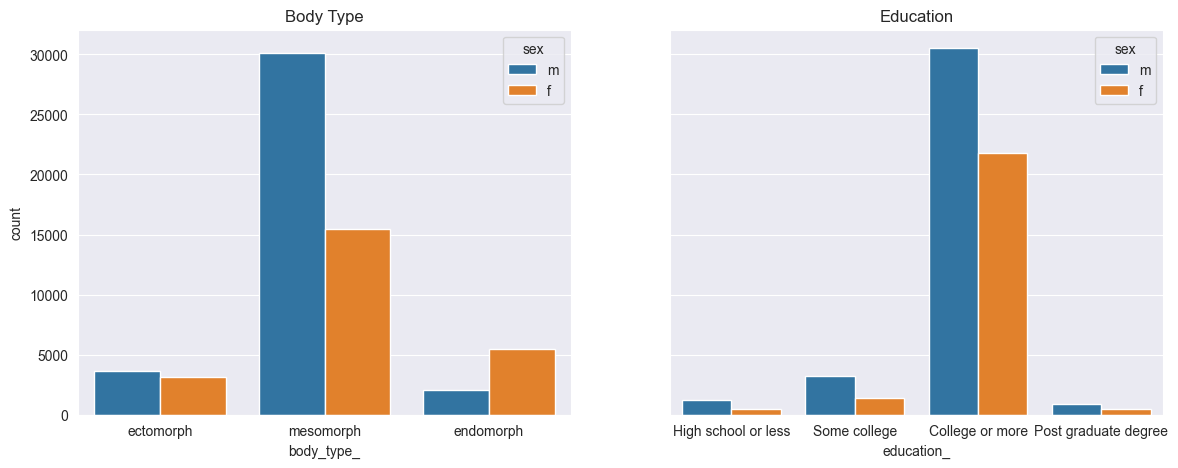

In [90]:
sns.set_style("darkgrid")
cat_cols = ['body_type_', 'education_']
titles = ['Body Type', 'Education']
fig4,ax4 = plt.subplots(ncols=2, figsize=(14,5), sharey=True)
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=ax4[i], hue='sex')
    ax4[i].set(title = titles[i])

In [91]:
drinks_categories = CategoricalDtype(categories=['not at all', 'rarely',
                                                'socially',
                                                'often', 'very often',
                                                'desperately'],
                                    ordered=True)
df['drinks_'] = df.drinks.astype(drinks_categories)
df.drinks_ = df.drinks_.fillna(drinks_categories.categories[int(np.median(df.drinks_.cat.codes))])

In [92]:
df.smokes.value_counts(dropna=False)

smokes
no                43896
NaN                5513
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64

In [93]:
43896 / len(df)

0.7322468180225866

In [94]:
smokes_dic = {('no',): 'no',
             ('sometimes', 'when drinking', 'trying to quit'): 'sometimes',
             ('yes',):'yes'}
smokes_categories = CategoricalDtype(categories=['no', 'sometimes',
                                                'yes'], ordered=True)
df['smokes_'] = df.smokes.apply(map_cat, args=(smokes_dic,)).astype(smokes_categories)
df.smokes_ = df.smokes_.fillna('no').astype(smokes_categories)
df.smokes_.value_counts(dropna=False).sort_index()

smokes_
no           49409
sometimes     8307
yes           2231
Name: count, dtype: int64

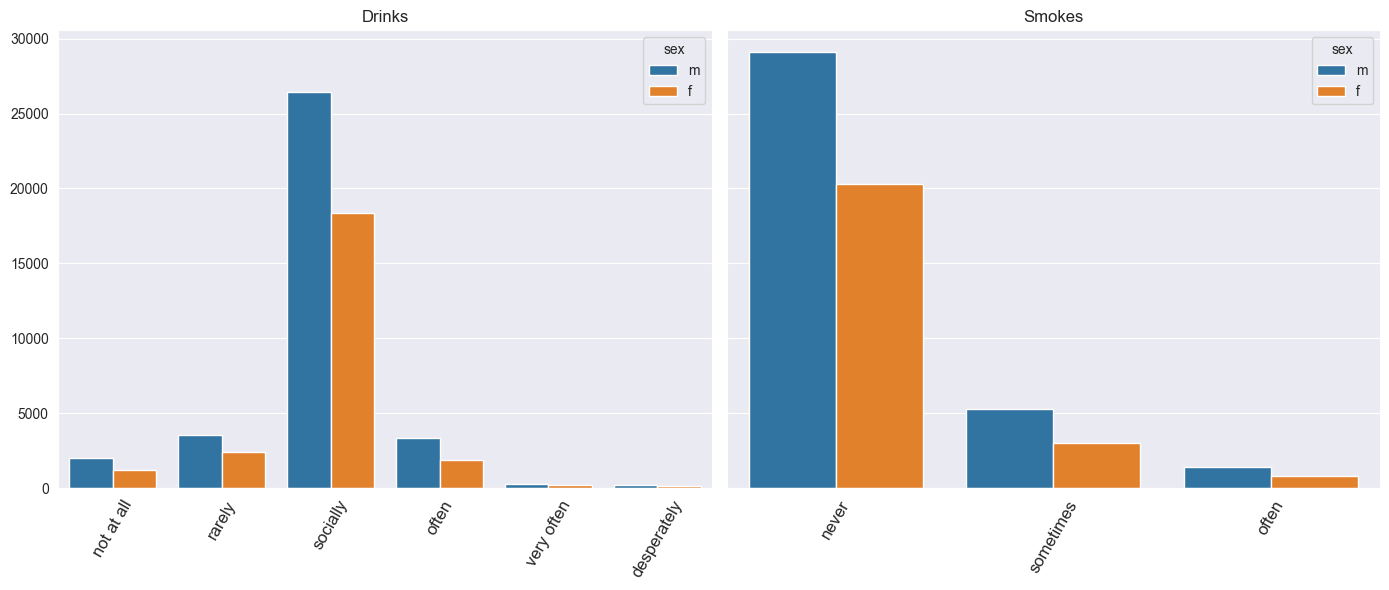

In [95]:
sns.set_style("darkgrid")
cat_cols = ['drinks_', 'smokes_']
titles = ['Drinks', 'Smokes']
xlabels = [list(drinks_categories.categories), ['never', 'sometimes',
            'often'], list(smokes_categories.categories)]
ticks = [6, 3, 3]
fig5, ax5 = plt.subplots(ncols=2, figsize=(14,6), sharey=True)
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x = col, ax=ax5[i], hue='sex')
    ax5[i].set(title=titles[i], xticks = range(len(xlabels[i])), 
               xlabel='', ylabel='')
    ax5[i].set_xticklabels(labels=xlabels[i], rotation=60, fontsize=12)
fig5.tight_layout()

In [104]:
sex_categories = CategoricalDtype(categories=['m', 'f'], ordered=True)
df['sex'] = df.sex.astype(sex_categories)

In [150]:
df.index = df.index.astype(int)

In [151]:
features = ['age', 'height', 'body_type_', 'education_', 'drinks_', 'smokes_', 'sex']

In [152]:
X = df[features[:2]].copy()
X.head()

,age,height
0,22.0,190.0
1,35.0,178.0
2,38.0,173.0
3,23.0,180.0
4,29.0,168.0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59947 entries, 0 to 173
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          59947 non-null  float64 
 1   status       59946 non-null  object  
 2   sex          59946 non-null  category
 3   orientation  59946 non-null  object  
 4   body_type    54650 non-null  object  
 5   diet         35551 non-null  object  
 6   drinks       56961 non-null  object  
 7   drugs        45866 non-null  object  
 8   education    53318 non-null  object  
 9   ethnicity    54266 non-null  object  
 10  height       59947 non-null  float64 
 11  income       11504 non-null  float64 
 12  job          51748 non-null  object  
 13  last_online  59946 non-null  object  
 14  location     59946 non-null  object  
 15  offspring    24385 non-null  object  
 16  pets         40025 non-null  object  
 17  religion     39720 non-null  object  
 18  sign         48890 non-null  obje

In [154]:
for feat in features[2:]:
    X[feat] = df[feat].cat.codes
    
    
X.isnull().sum()

age           0
height        0
body_type_    0
education_    0
drinks_       0
smokes_       0
sex           0
dtype: int64

In [155]:
X.head()

,age,height,body_type_,education_,drinks_,smokes_,sex
0,22.0,190.0,2,2,2,1,0
1,35.0,178.0,1,2,3,0,0
2,38.0,173.0,0,2,2,0,0
3,23.0,180.0,0,2,2,0,0
4,29.0,168.0,1,2,2,0,0


In [156]:
scaler = StandardScaler()
scaler.set_output(transform='pandas')

X_scaled = scaler.fit_transform(X.drop(columns='sex'))

KMeans

In [129]:
num_clusters = list(np.arange(1, 40))

inertias = []

for k in num_clusters:
    model = KMeans(n_clusters = k, n_init='auto')
    model.fit(X_scaled)
    inertias.append(model.inertia_)

[[<matplotlib.axis.XTick at 0x1bc1a24a630>,
 Text(0.5, 0, 'clusters'),
 Text(0.5, 1.0, 'Inertia')]

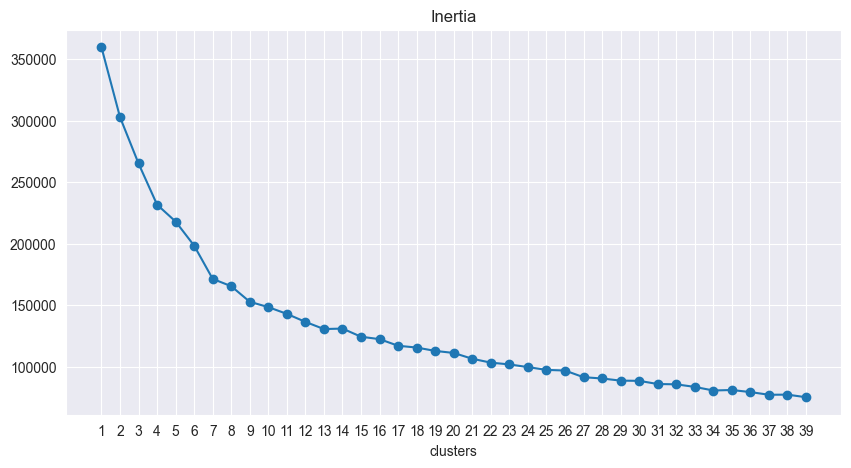

In [130]:
fig7, ax7 = plt.subplots(figsize = (10,5))

ax7.plot(num_clusters, inertias, '-o')
ax7.set(xticks=num_clusters, xlabel='clusters', title='Inertia')

In [131]:
k = 16
model = KMeans(n_clusters = k, n_init = 'auto')
model.fit(X_scaled)
df['membership'] = model.labels_
df.membership.value_counts()

membership
0     14061
2      9698
7      5419
11     3937
15     3545
1      2662
4      2504
12     2503
14     2460
10     2371
13     2317
3      2006
6      1802
8      1708
9      1540
5      1414
Name: count, dtype: int64

[Text(0.5, 1.0, 'Users per cluster'), Text(0, 0.5, '')]

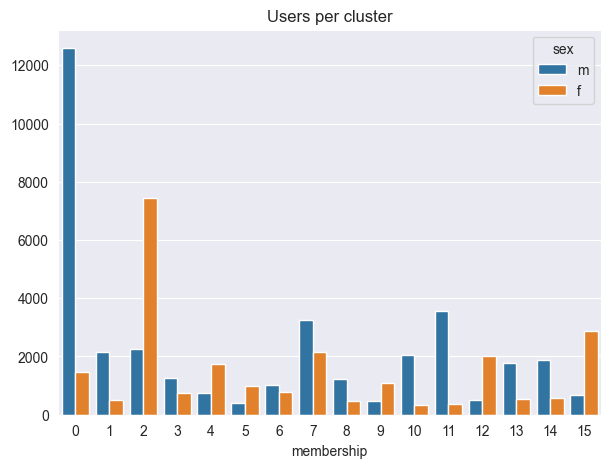

In [132]:
# Пользователи на кластер
fig8, ax8 = plt.subplots(figsize=(7,5))

sns.countplot(data=df, x='membership', ax=ax8, hue='sex')
ax8.set(title = 'Users per cluster', ylabel='')

KNN

In [157]:
X_scaled.head()

,age,height,body_type_,education_,drinks_,smokes_
0,-1.093907,1.636207,2.016122,0.249909,0.131147,1.599576
1,0.281373,0.449119,-0.024475,0.249909,1.581938,-0.432935
2,0.598745,-0.045501,-2.065071,0.249909,0.131147,-0.432935
3,-0.988116,0.646967,-2.065071,0.249909,0.131147,-0.432935
4,-0.353372,-0.540121,-0.024475,0.249909,0.131147,-0.432935


In [158]:
X.head()

,age,height,body_type_,education_,drinks_,smokes_,sex
0,22.0,190.0,2,2,2,1,0
1,35.0,178.0,1,2,3,0,0
2,38.0,173.0,0,2,2,0,0
3,23.0,180.0,0,2,2,0,0
4,29.0,168.0,1,2,2,0,0


In [159]:
knn = NearestNeighbors(n_neighbors=10)
knn.fit(X_scaled.values)

NearestNeighbors(n_neighbors=10)

In [429]:
scaler = StandardScaler()
scaler.set_output(transform='pandas')

scaler.fit(X.drop(columns='sex'))
X_scaled = scaler.transform(X.drop(columns='sex'))

In [424]:
knn.kneighbors(X_scaled.iloc[0].values.reshape(1, -1))

(array([[0.        , 0.19784804, 0.19784804, 0.22435581, 0.22435581,
         0.28967324, 0.28967324, 0.28967324, 0.28967324, 0.29677206]]),
 array([[    0, 38952, 46166, 40602, 28433, 17667, 20370, 44367, 16160,
         33081]], dtype=int64))

Евклидово расстояние по 1 пользователю

In [433]:
from sklearn.metrics.pairwise import euclidean_distances

# Функция для поиска похожих пользователей
def find_similar_profiles(user_id, profiles_df, n_neighbors=5):
    # Отделяем пол для сравнения
    user_data = profiles_df.drop(columns='sex').iloc[user_id].values.reshape(1, -1)
    
    distances = euclidean_distances(profiles_df.drop(columns='sex').values, user_data).flatten()
    
    men = profiles_df[profiles_df['sex'] == 0].index
    women = profiles_df[profiles_df['sex'] == 1].index
  
    men_distances = distances[men]
    women_distances = distances[women]

    men_sorted = men[np.argsort(men_distances)[:n_neighbors]]
    women_sorted = women[np.argsort(women_distances)[:n_neighbors]]
    
    return men_sorted, women_sorted

user_id = 0
men, women = find_similar_profiles(user_id, X, n_neighbors=5)

print("5 мужчин:", men)
print("5 женщин:", women)


5 мужчин: Index([0, 16606, 7552, 37303, 53392], dtype='int32')
5 женщин: Index([58822, 28433, 18556, 25683, 26993], dtype='int32')


Распределение пользователей, ищущих комнату с помощью евклидова расстояния

In [438]:
def random_users_selection(df, n):
    if n > len(df):
        n = len(df)
    return df.sample(n=n, random_state=np.random.randint(1, 1000))

n_random_users = 50
users = random_users_selection(X, n_random_users)

users.head()

# users_pca = pca.fit_transform(users.drop(columns='sex'))

# users_pca_df = pd.DataFrame(users_pca, columns=['pca1', 'pca2'])
# users_pca_df.index = users.index 
# users_pca_df['sex'] = users['sex']
# users_pca_df.head()

,age,height,body_type_,education_,drinks_,smokes_,sex
35589,31.0,183.0,1,2,2,0,0
52592,24.0,178.0,1,2,2,0,1
21422,43.0,173.0,1,2,0,0,0
18241,26.0,160.0,0,2,1,0,1
32515,44.0,188.0,1,2,2,0,0


In [439]:
users_pca_df.shape[0]

100

In [440]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances

def group_users_by_similarity(users_df, n_men=5, n_women=5):
    men = users_df[users_df['sex'] == 0].copy()
    women = users_df[users_df['sex'] == 1].copy()
    
    distances = pairwise_distances(users_df.drop(columns='sex'), metric='euclidean')
    distances_df = pd.DataFrame(distances, index=users_df.index, columns=users_df.index)
    groups = []
    
    available_indices = users_df.index.tolist()
    
    while len(available_indices) >= n_men + n_women:
        selected_men = []
        selected_women = []
        
        user_index = available_indices[0]

        # if users_df.loc[user_index, users_df.columns]['sex'] == 0:
        #     selected_men.append(user_index)
        # else:
        #     selected_women.append(user_index)
        
        available_indices.remove(user_index)
        
        user_distances = distances_df.loc[user_index]

        closest_indices = user_distances.nsmallest(len(user_distances)).index
        
        
        for idx in closest_indices:
            if len(selected_men) < n_men and users_df.loc[idx, 'sex'] == 0:
                selected_men.append(idx)
            elif len(selected_women) < n_women and users_df.loc[idx, 'sex'] == 1:
                selected_women.append(idx)
            if len(selected_men) == n_men and len(selected_women) == n_women:
                break
        
        if len(selected_men) == n_men and len(selected_women) == n_women:
            group = selected_men + selected_women
            groups.append(group)
            available_indices = [idx for idx in available_indices if idx not in group]
            for i in group:
                distances_df = distances_df.drop(i, axis=0)
                distances_df = distances_df.drop(i, axis=1)
        if (men[men.index.isin(available_indices)].shape[0] < n_men) or  (women[women.index.isin(available_indices)].shape[0] < n_women):
            break

    return groups, men[men.index.isin(available_indices)], women[women.index.isin(available_indices)]


# groups, remaining_men, remaining_women = group_users_by_similarity(users)

groups, remaining_men, remaining_women = group_users_by_similarity(users)

print(f'Создано групп: {len(groups)}')
for i, group in enumerate(groups):
    print(f'Группа {i + 1}: {group}')

print(f'Осталось мужчин: {len(remaining_men)}, женщин: {len(remaining_women)}')

Создано групп: 3
Группа 1: [35589, 59608, 32274, 22765, 37711, 54829, 52592, 5165, 28066, 33162]
Группа 2: [21422, 17313, 8811, 55658, 16394, 21123, 38241, 3115, 27124, 3277]
Группа 3: [53108, 52924, 53754, 35422, 14831, 18241, 52422, 27305, 8053, 55535]
Осталось мужчин: 16, женщин: 4


In [441]:
pca = PCA(n_components=2)
users_pca = pca.fit_transform(users.drop(columns='sex'))

users_pca_df = pd.DataFrame(users_pca, columns=['pca1', 'pca2'])
users_pca_df.index = users.index 


print(users_pca_df.head())

            pca1       pca2
35589   8.949043   0.465150
52592   5.867051  -7.565762
21422  -3.757231   9.565821
18241 -12.067172 -10.154684
32515  10.524638  14.303364


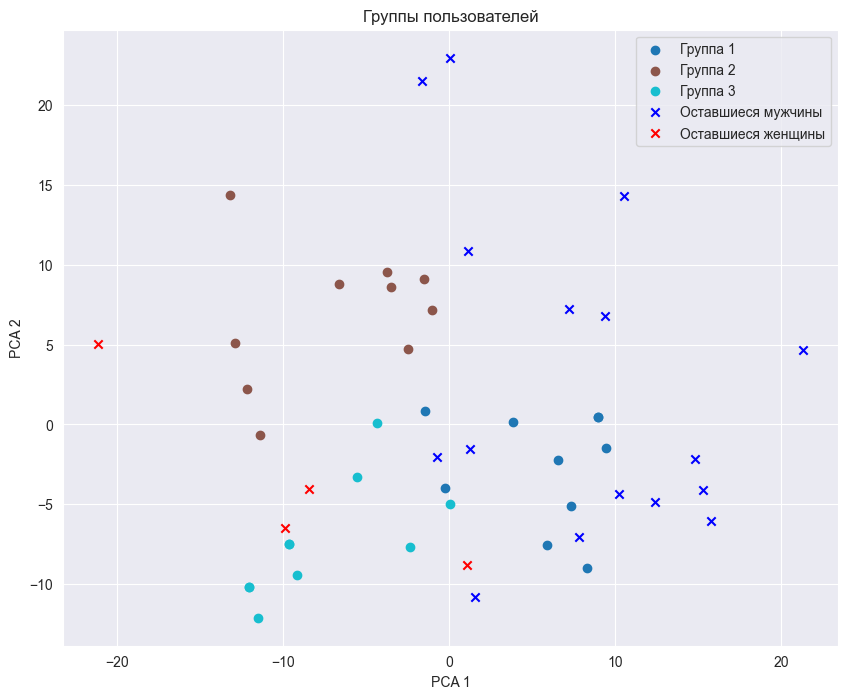

In [442]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

colors = plt.cm.tab10(np.linspace(0, 1, len(groups)))

for i, group in enumerate(groups):
    group_indices = users_pca_df.index[users_pca_df.index.isin(group)]  # Индексы группы
    plt.scatter(users_pca_df.loc[group_indices, 'pca1'], users_pca_df.loc[group_indices, 'pca2'],
                label=f'Группа {i + 1}', color=colors[i])
    
remaining_men_indices = users_pca_df.index[users_pca_df.index.isin(remaining_men.index)]
plt.scatter(users_pca_df.loc[remaining_men_indices, 'pca1'], users_pca_df.loc[remaining_men_indices, 'pca2'],
            color='blue', label='Оставшиеся мужчины', marker='x')

remaining_women_indices = users_pca_df.index[users_pca_df.index.isin(remaining_women.index)]
plt.scatter(users_pca_df.loc[remaining_women_indices, 'pca1'], users_pca_df.loc[remaining_women_indices, 'pca2'],
            color='red', label='Оставшиеся женщины', marker='x')

plt.title('Группы пользователей')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

Выбор пользователей с помощью KMeans

In [133]:
features = ['age', 'height', 'sex', 'body_type_',
           'education_', 'drinks_', 'smokes_', 'membership']

In [134]:
df.loc[0:1000, features]

,age,height,sex,body_type_,education_,drinks_,smokes_,membership
0.0,22.0,190.0,m,endomorph,College or more,socially,sometimes,9
1.0,35.0,178.0,m,mesomorph,College or more,often,no,14
2.0,38.0,173.0,m,ectomorph,College or more,socially,no,12
3.0,23.0,180.0,m,ectomorph,College or more,socially,no,10
4.0,29.0,168.0,m,mesomorph,College or more,socially,no,2
5.0,29.0,170.0,m,mesomorph,College or more,socially,no,2
6.0,32.0,165.0,f,mesomorph,College or more,socially,no,2
7.0,31.0,165.0,f,mesomorph,College or more,socially,no,2
8.0,24.0,170.0,f,mesomorph,College or more,socially,sometimes,4
9.0,37.0,165.0,m,mesomorph,Some college,not at all,no,3


In [135]:
df.loc[1:20, features]

,age,height,sex,body_type_,education_,drinks_,smokes_,membership
1.0,35.0,178.0,m,mesomorph,College or more,often,no,14
2.0,38.0,173.0,m,ectomorph,College or more,socially,no,12
3.0,23.0,180.0,m,ectomorph,College or more,socially,no,10
4.0,29.0,168.0,m,mesomorph,College or more,socially,no,2
5.0,29.0,170.0,m,mesomorph,College or more,socially,no,2
6.0,32.0,165.0,f,mesomorph,College or more,socially,no,2
7.0,31.0,165.0,f,mesomorph,College or more,socially,no,2
8.0,24.0,170.0,f,mesomorph,College or more,socially,sometimes,4
9.0,37.0,165.0,m,mesomorph,Some college,not at all,no,3
10.0,35.0,178.0,m,mesomorph,College or more,socially,yes,11


In [136]:
user_id = 410

In [137]:
if df.loc[user_id, features].sex == 'f':
    sex_goal = 'm'
else:
    sex_goal = 'f'

In [138]:
users = df.loc[(df.sex == sex_goal)&
              (df.membership == df.at[user_id, 'membership'])].index
print(f'So we have found {len(users)} {sex_goal} users in the same cluster.\n')

So we have found 1469 f users in the same cluster.



In [139]:
# Расстояние между пользователями kmeans
def distance(row, user):
    result = 0
    for i, v in enumerate(row):
        result += (v - user.iloc[i])**2
    return result ** 0.5;

In [140]:
user = X_scaled.loc[user_id]
distances = X_scaled.loc[users].apply(distance, axis=1, 
                            args=(user,)).sort_values();

In [141]:
df.loc[user_id:user_id, features]

,age,height,sex,body_type_,education_,drinks_,smokes_,membership
410.0,39.0,183.0,m,mesomorph,College or more,socially,no,0


In [142]:
df.loc[distances.index, features].head(10)

,age,height,sex,body_type_,education_,drinks_,smokes_,membership
31775.0,39.0,183.0,f,mesomorph,College or more,socially,no,0
54761.0,39.0,183.0,f,mesomorph,College or more,socially,no,0
25205.0,40.0,183.0,f,mesomorph,College or more,socially,no,0
21093.0,38.0,183.0,f,mesomorph,College or more,socially,no,0
1783.0,38.0,183.0,f,mesomorph,College or more,socially,no,0
49331.0,38.0,183.0,f,mesomorph,College or more,socially,no,0
51428.0,41.0,183.0,f,mesomorph,College or more,socially,no,0
25021.0,41.0,183.0,f,mesomorph,College or more,socially,no,0
33625.0,37.0,183.0,f,mesomorph,College or more,socially,no,0
13675.0,37.0,183.0,f,mesomorph,College or more,socially,no,0


In [143]:
gamma = 1 / (len(features))
S = pd.DataFrame(distances.apply(lambda x: round(np.exp(-x * gamma)*100, 1)).rename('affinity'))
S.rename_axis('user_id', inplace=True)
S.shape

(1469, 1)

In [117]:
joblib.dump(model, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [ ]:
model_loaded = joblib.load('kmeans_model.pkl')